In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [3]:
match_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
# Let us get some basic stats #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))

Number of matches played so far :  636
Number of seasons :  10


## Number of matches each season: 

### Let us first look at the number of matches played per season."""

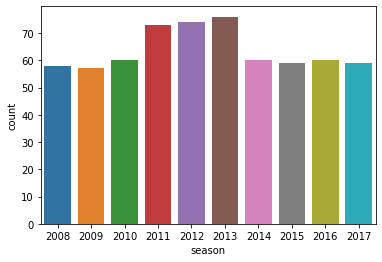

In [7]:
sns.countplot(x='season', data=match_df)
plt.show()

### There is a spike in the middle for three years where the number of matches are more than 70.

## Number of matches in each venue:

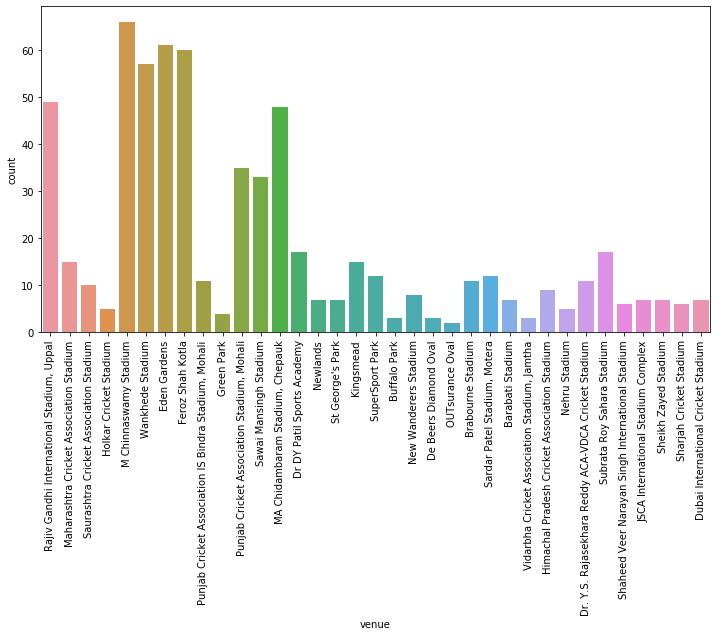

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

 ### There are quite a few venues present in the data with "M Chinnaswamy Stadium" being the one with most number of matches followed by "Eden Gardens".

## Number of matches played by each team:

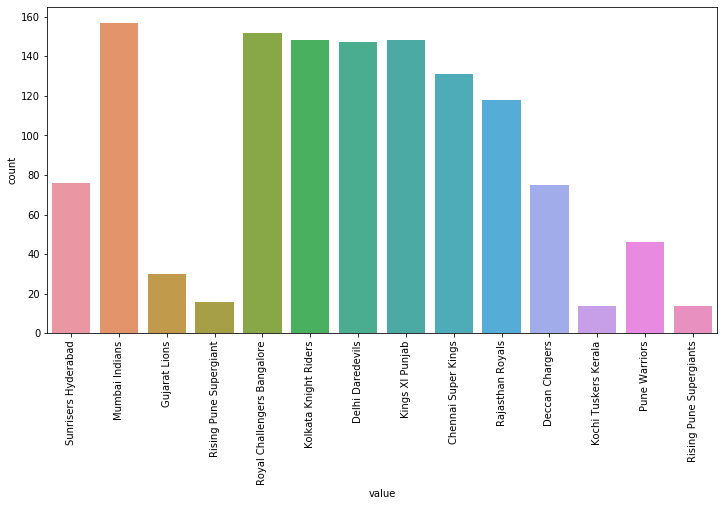

In [9]:
temp_df = pd.melt(match_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
temp_df.head(2)
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

"Mumbai Indians" lead the pack with most number of matches played followed by "Royal Challengers Bangalore". There are also teams with very few matches like 'Rising Pune Supergiants', 'Gujarat Lions' as they are new teams that came in only last season.

Number of wins per team:

 ### MI again leads the pack followed by CSK.

## Champions each season:

### Now let us see the champions in each season.

In [10]:
temp_df = match_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


## Toss decision:

### Let us see the toss decisions taken so far.

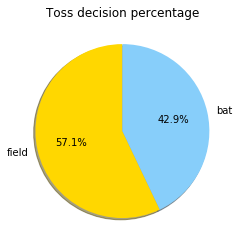

In [11]:
temp_series = match_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

### Almost 55% of the toss decisions are made to field first. Now let us see how this decision varied over time.

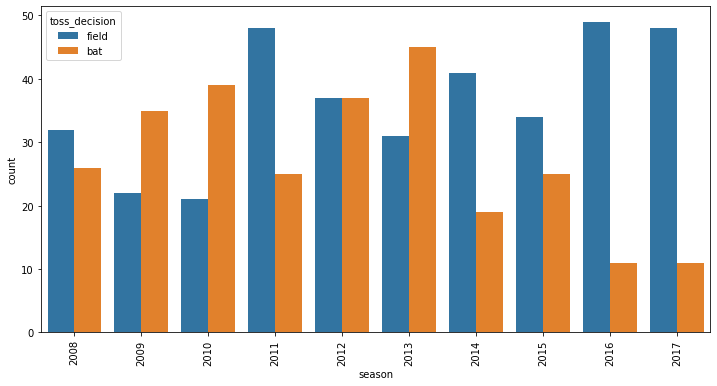

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

#### It seems during the initial years, teams wanted to bat first. Voila.! Look at the 2016 season, most of the toss decisions are to field first.

#### Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.

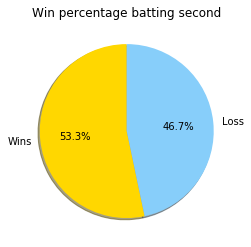

In [13]:
num_of_wins = (match_df.win_by_wickets>0).sum()
num_of_loss = (match_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

#### So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


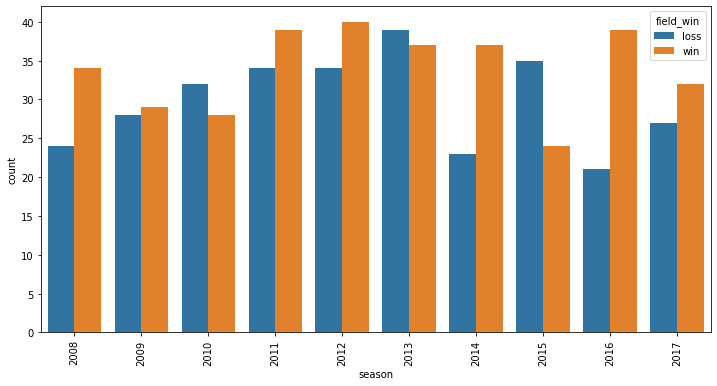

In [14]:
match_df["field_win"] = "win"
match_df["field_win"].ix[match_df['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

#### Number of wins batting second is also quite high in the latest season (2016) while in 2015 teams batting first has won more than batting second.

### Top players of the match:

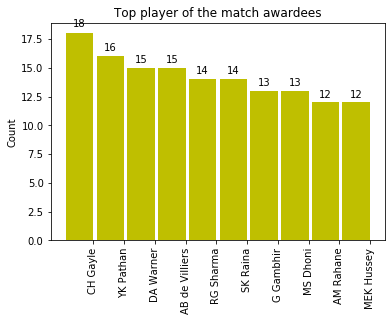

In [15]:
temp_series = match_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

#### CH Gayle is the top player of the match awardee in all the seasons of IPL.



### How lucky are the toss winning teams?:

#### Now let us see how lucky is the toss winner. Do they often end up on the winning side?! Let us see.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


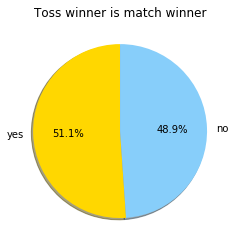

In [16]:
match_df['toss_winner_is_winner'] = 'no'
match_df['toss_winner_is_winner'].ix[match_df.toss_winner == match_df.winner] = 'yes'
temp_series = match_df.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

#### it is not really the case it seems. The chance is 50-50 for both the teams.

#### Let us also look at the team wise break up. If the team wins the toss, will it end up in the winning side. Will be interesting to see.

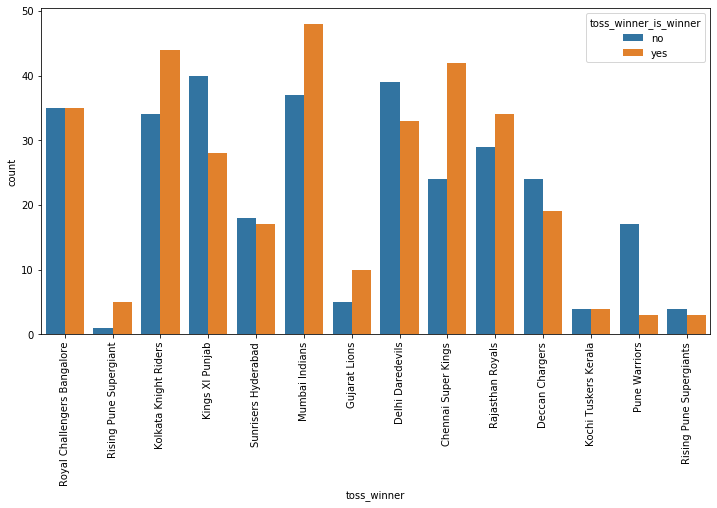

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

### It seems for Chennai Super Kings (CSK) winning the toss is an indication of winning the match with high probability.

#### On the other hand, Pune Warriors end up losing the matches more often when they won the toss.

#### So far we have looked at the match data to get insights. Now let us look at the delivery dataset which is more granular to gain some more insights. To start with, let us look at the top few rows.

In [18]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Batsman analysis:

#### Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.

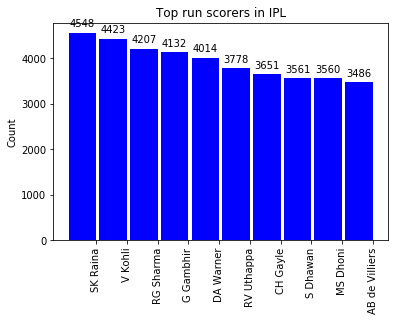

In [19]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

#### Virat Kohli is leading the chart followed closely by Raina. Gayle is the top scorer among foreign players.

#### Now let us see the players with more number of boundaries in IPL

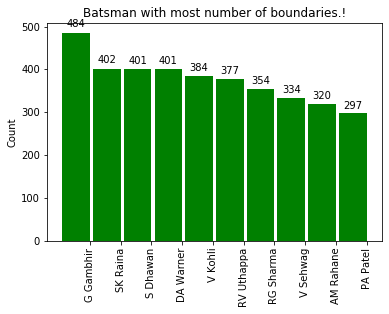

In [20]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
autolabel(rects)
plt.show()

#### Gambhir is way ahead of others - almost 60 boundaries more than Kohli.! Nice to Sachin in the top 10 list :)

#### Now let us check the number of 6's

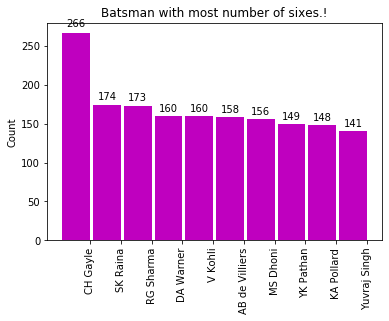

In [21]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()

#### There you see the big man. Gayle, the unassailable leader in the number of sixes.

#### Raina is third in both number of 4's and 6's

#### Now let us see the batsman who has played the most number of dot balls.

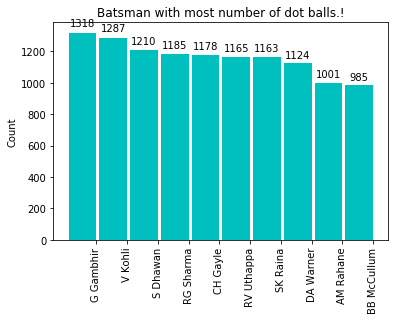

In [22]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
autolabel(rects)
plt.show()

#### It is interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

### Let us check the percentage distribution now.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


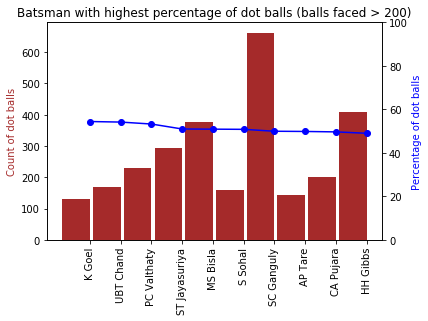

In [23]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = score_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.ix[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

#### Batsman with more than 200 balls faced in taken and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 1000 balls and nearly half of them are dot balls. It is surprising to see names like Jayasuriya and Gibbs in there.!

### Bowler Analysis:

#### Now let us see the bowlers who has bowled most number of balls in IPL.

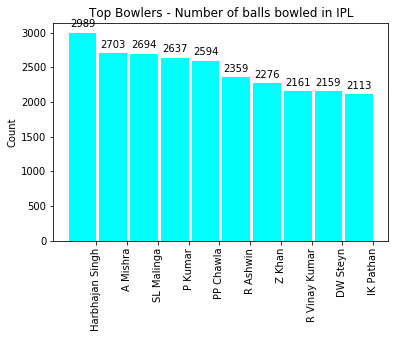

In [24]:
temp_df = score_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
autolabel(rects)
plt.show()

#### Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

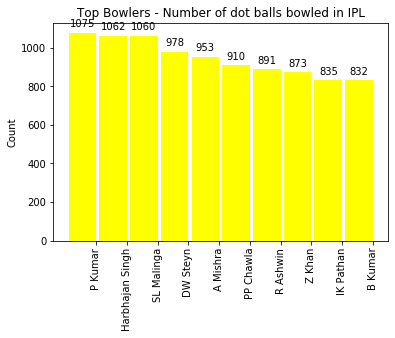

In [25]:
temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='yellow')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
autolabel(rects)
plt.show()

#### Pravin Kumar is the one with more number of dot balls followed by Steyn and Malinga.

#### Now let us see the bowlers who has bowled more number of extras in IPL.

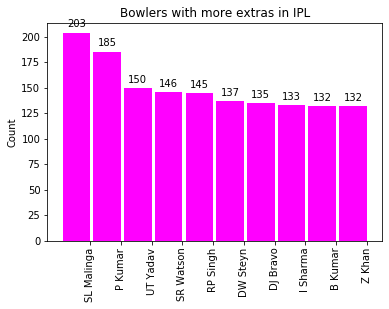

In [26]:
temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
autolabel(rects)
plt.show()

#### Malinga tops the chart with 178 extra runs followed by Pravin Kumar.

#### Now let us see most common dismissal types in IPL.

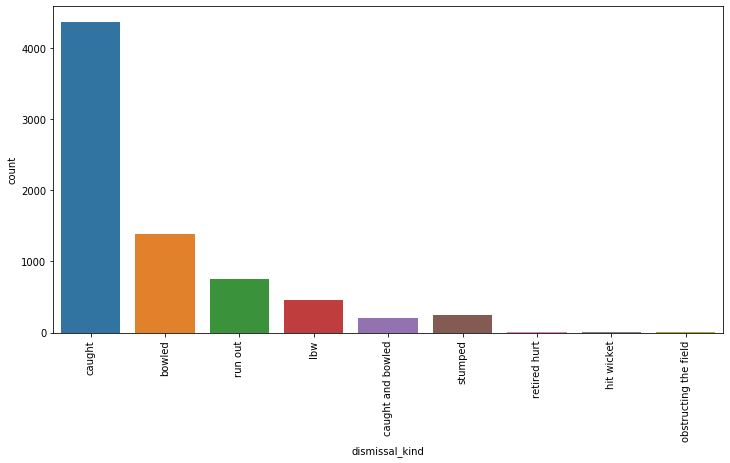

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()

#### Caught is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. 'Obstructing the field' is one of the dismissal type as well in IPL.!

In [29]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 50)

#### Load the dataset and look at the top few rows to get an idea about the data.

#### If you want to know more about the data, please look at the kernel here



In [30]:
score_df = pd.read_csv("deliveries.csv")
match_df = pd.read_csv("matches.csv")
score_df.tail(13)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150447,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,6,Sachin Baby,STR Binny,B Kumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
150448,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,1,STR Binny,Sachin Baby,Mustafizur Rahman,0,0,0,0,0,0,1,0,1,STR Binny,run out,DJ Hooda
150449,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,2,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150450,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,3,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
150451,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,4,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150452,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,5,Sachin Baby,CJ Jordan,Mustafizur Rahman,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150453,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,Sachin Baby,CJ Jordan,Mustafizur Rahman,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
150454,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,CJ Jordan,Sachin Baby,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha


#### In this analysis, we are going to look at the matches played only during the latest season 2016. So let us subset the dataset to get only these rows.

#### Also some matches are affected by rain and hence Duckworth-Lewis method are used for these matches and so using these matches for training our model might cause some error in our training and so let us neglect those matches as well.

In [31]:
# Let us take only the matches played in 2016 for this analysis #
match_df = match_df.ix[match_df.season==2016,:]
match_df = match_df.ix[match_df.dl_applied == 0,:]
match_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
576,577,2016,Mumbai,2016-04-09,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,Rising Pune Supergiants,0,9,AM Rahane,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
577,578,2016,Kolkata,2016-04-10,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,AD Russell,Eden Gardens,S Ravi,C Shamshuddin,NaN
578,579,2016,Chandigarh,2016-04-11,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,5,AJ Finch,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,VA Kulkarni,NaN
579,580,2016,Bangalore,2016-04-12,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
580,581,2016,Kolkata,2016-04-13,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Eden Gardens,Nitin Menon,S Ravi,NaN


okay. Now that we are done with the pre-processing, let us create the variables that are needed for building our model.

Some of the important variables which I could think of are the following:

Runs scored in the last over
Wickets taken in the last over
Total score of the innings
Total wickets
Target that the team is chasing down
Remaining target
Run rate
Required run rate
Difference between run rate and required run rate
Binary variables on whether the team for which we are predicting is batting team or bowling team
There are several other variables which we can create including

Team name
Opponent team name
Score in the last 'n' overs
Players who are batting
Player who is bowling and so on.
But ours is a good set of variables to start with.



In [32]:
# runs and wickets per over #
score_df = pd.merge(score_df, match_df[['id','season', 'winner', 'result', 'dl_applied', 'team1', 'team2']], left_on='match_id', right_on='id')
score_df.player_dismissed.fillna(0, inplace=True)
score_df['player_dismissed'].ix[score_df['player_dismissed'] != 0] = 1
train_df = score_df.groupby(['match_id', 'inning', 'over', 'team1', 'team2', 'batting_team', 'winner'])[['total_runs', 'player_dismissed']].agg(['sum']).reset_index()
train_df.columns = train_df.columns.get_level_values(0)

# innings score and wickets #
train_df['innings_wickets'] = train_df.groupby(['match_id', 'inning'])['player_dismissed'].cumsum()
train_df['innings_score'] = train_df.groupby(['match_id', 'inning'])['total_runs'].cumsum()
train_df.head()

# Get the target column #
temp_df = train_df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
temp_df = temp_df.ix[temp_df['inning']==1,:]
temp_df['inning'] = 2
temp_df.columns = ['match_id', 'inning', 'score_target']
train_df = train_df.merge(temp_df, how='left', on = ['match_id', 'inning'])
train_df['score_target'].fillna(-1, inplace=True)

# get the remaining target #
def get_remaining_target(row):
    if row['score_target'] == -1.:
        return -1
    else:
        return row['score_target'] - row['innings_score']

train_df['remaining_target'] = train_df.apply(lambda row: get_remaining_target(row),axis=1)

# get the run rate #
train_df['run_rate'] = train_df['innings_score'] / train_df['over']

# get the remaining run rate #
def get_required_rr(row):
    if row['remaining_target'] == -1:
        return -1.
    elif row['over'] == 20:
        return 99
    else:
        return row['remaining_target'] / (20-row['over'])
    
train_df['required_run_rate'] = train_df.apply(lambda row: get_required_rr(row), axis=1)

def get_rr_diff(row):
    if row['inning'] == 1:
        return -1
    else:
        return row['run_rate'] - row['required_run_rate']
    
train_df['runrate_diff'] = train_df.apply(lambda row: get_rr_diff(row), axis=1)
train_df['is_batting_team'] = (train_df['team1'] == train_df['batting_team']).astype('int')
train_df['target'] = (train_df['team1'] == train_df['winner']).astype('int')

train_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


,match_id,inning,over,team1,team2,batting_team,winner,total_runs,player_dismissed,innings_wickets,innings_score,score_target,remaining_target,run_rate,required_run_rate,runrate_diff,is_batting_team,target
0,577,1,1,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,Rising Pune Supergiants,8,0,0,8,-1.0,-1.0,8.000000,-1.0,-1.0,1,0
1,577,1,2,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,Rising Pune Supergiants,4,1,1,12,-1.0,-1.0,6.000000,-1.0,-1.0,1,0
2,577,1,3,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,Rising Pune Supergiants,8,0,1,20,-1.0,-1.0,6.666667,-1.0,-1.0,1,0
3,577,1,4,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,Rising Pune Supergiants,9,1,2,29,-1.0,-1.0,7.250000,-1.0,-1.0,1,0
4,577,1,5,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,Rising Pune Supergiants,1,2,4,30,-1.0,-1.0,6.000000,-1.0,-1.0,1,0


Now let us split the data and keep the final match as our validation sample

In [40]:
x_cols = ['inning', 'over', 'total_runs', 'player_dismissed', 'innings_wickets', 'innings_score', 'score_target', 'remaining_target', 'run_rate', 'required_run_rate', 'runrate_diff', 'is_batting_team']

# let us take all the matches but for the final as development sample and final as val sample #
val_df = train_df.ix[train_df.match_id == 577,:]
dev_df = train_df.ix[train_df.match_id != 577,:]

# create the input and target variables #
dev_X = np.array(dev_df[x_cols[:]])
dev_y = np.array(dev_df['target'])
val_X = np.array(val_df[x_cols[:]])[:-1,:]
val_y = np.array(val_df['target'])[:-1]
print(dev_X.shape, dev_y.shape)
print(val_X.shape, val_y.shape)



(2140, 12) (2140,)
(34, 12) (34,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-de

AttributeError: 'numpy.ndarray' object has no attribute 'info'

We shall use Xgboost for our modeling. Let us create a custom function for the sam

Now we are all set to build our model and make predictions.

In [34]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 123,
    'verbose': 0
}

Important variables:

Now that we have built our model, let us look at the important variables that contribute to the win

Run rate is the most important predictor of the win. It makes sense since if the run rate is high, the team have higher tendency to win.

Innings score is the second most important predictor with target score being the third.

Win probability at the end of each over for SRH:

Now that we had a look at the important predictor variables, let us check the win probability predictions for the final match.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lg=LogisticRegression()
lg.fit(dev_X,dev_y)
preds=lg.predict(val_X)
acc=classification_report(preds,val_y)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
match_df.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
576,577,2016,Mumbai,2016-04-09,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,Rising Pune Supergiants,0,9,AM Rahane,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN


In [65]:
score_df=pd.read_csv('deliveries.csv')
score_df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


score_df.head(3)

In [66]:
Batsman_Score_by_Match= score_df[["match_id","batsman","batsman_runs"]]
Batsman_Score_by_Match=Batsman_Score_by_Match.groupby(["match_id","batsman"]).sum()
Batsman_with_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=100].reset_index()
Batsman_with_centuries=Batsman_with_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_centuries.columns=["batsman","No_of_centuries"]
Batsman_with_centuries

,batsman,No_of_centuries
0,CH Gayle,5
1,V Kohli,4
2,DA Warner,3
3,AB de Villiers,3
4,M Vijay,2
5,AC Gilchrist,2
6,V Sehwag,2
7,BB McCullum,2
8,HM Amla,2
9,SR Watson,2


In [75]:
Batsman_score=deliveries.groupby('batsman')["batsman_runs"].agg(sum).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
#Lets have a look what is happening 
# we group our deliveries data by Batsman ans then we sum the batsman_runs mean run scored by batsman
# Then sort those values in decreasing order
# reset_index means we are indexing again our data which changed due to first group by then by sort
Top_batsman_score= Batsman_score.iloc[:15,:] # here I am taking only top 10 scorer in IPL
Top_batsman_score

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


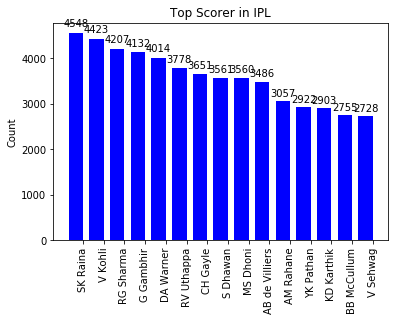

In [76]:
labels = np.array(Top_batsman_score['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.7 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Top_batsman_score['batsman_runs']), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("Top Scorer in IPL")
autolabel(rects)

In [77]:
Batsman_Ball_faced=deliveries.groupby(['batsman'])["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Batsman_Ball_faced_Top=Batsman_Ball_faced.iloc[:15,:] # batsman with most ball faced

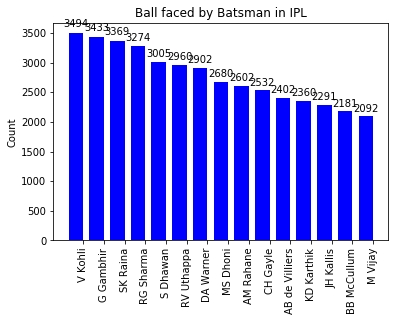

In [78]:
labels = np.array(Batsman_Ball_faced_Top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.7 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Batsman_Ball_faced_Top['ball']), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("Ball faced by Batsman in IPL")
autolabel(rects)


In [79]:
Batsman_strike_rate= pd.merge(Batsman_score,Batsman_Ball_faced,on="batsman",how='outer')
# here I am merging two data frames batsman run and batsman ball to get strike rate
Batsman_strike_rate= Batsman_strike_rate[Batsman_strike_rate["batsman_runs"]>=500]
# here I am taking only batsmen habing more than 500 runs under their belts
Batsman_strike_rate["strike_rate"]= (Batsman_strike_rate["batsman_runs"]/Batsman_strike_rate["ball"])*100
# formula for strike rate
Batsman_strike_rate= Batsman_strike_rate[["batsman","strike_rate"]]
# removing other coloumns from here only keeping batsman and strike rate
Batsman_strike_rate1=Batsman_strike_rate.sort_values(by="strike_rate",ascending=False).reset_index(drop=True)
Batsman_strike_rate1.iloc[:20,:]

,batsman,strike_rate
0,AD Russell,164.000000
1,GJ Maxwell,157.564103
2,V Sehwag,148.827059
3,RR Pant,148.031496
4,AB de Villiers,145.129059
5,CH Gayle,144.194313
6,JC Buttler,140.800000
7,YK Pathan,140.751445
8,KA Pollard,140.621266
9,DA Warner,138.318401


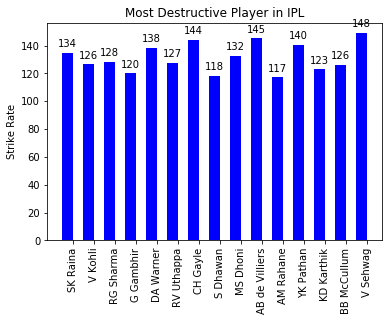

In [80]:
Batsman_strike_rate_Top=Batsman_strike_rate.iloc[:15,:]
labels = np.array(Batsman_strike_rate_Top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Batsman_strike_rate_Top['strike_rate']), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Strike Rate")
ax.set_title("Most Destructive Player in IPL")
autolabel(rects)


In [81]:
Batsman_dotballs=deliveries[deliveries["extra_runs"]==0].groupby(['batsman'])["batsman_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
# here the dot ball for a batsman will be if it is a legal delivery and batsman didn't score a run on it
Batsman_dotballs.columns = ["batsman","No_of_Balls"]
Batsman_dotballs.iloc[:20,:]

,batsman,No_of_Balls
0,V Kohli,1163
1,G Gambhir,1137
2,RG Sharma,1086
3,S Dhawan,1074
4,RV Uthappa,1006
5,SK Raina,1003
6,CH Gayle,991
7,DA Warner,984
8,AM Rahane,899
9,JH Kallis,878


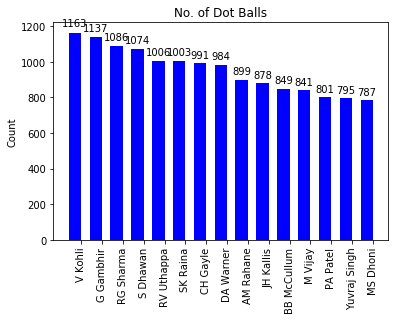

In [82]:
Batsman_dotballs_Top = Batsman_dotballs.iloc[:15,:]
labels = np.array(Batsman_dotballs_Top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.6 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Batsman_dotballs_Top["No_of_Balls"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No. of Dot Balls")
autolabel(rects)

In [83]:
Percentage_of_dot_balls=pd.merge(Batsman_Ball_faced,Batsman_dotballs,on="batsman",how='outer')
Percentage_of_dot_balls["% of dot balls"] = (Percentage_of_dot_balls["No_of_Balls"]/Percentage_of_dot_balls["ball"])*100
Percentage_of_dot_balls=Percentage_of_dot_balls[Percentage_of_dot_balls["ball"]>300].reset_index(drop=True)
Percentage_of_dot_balls_top=Percentage_of_dot_balls.sort_values(by="% of dot balls",ascending=False).reset_index(drop=True).iloc[:15,:]
Percentage_of_dot_balls_top.iloc[:20,:]

,batsman,ball,No_of_Balls,% of dot balls
0,PC Valthaty,432,209.0,48.379630
1,UBT Chand,314,148.0,47.133758
2,CA Pujara,403,178.0,44.168734
3,P Kumar,323,141.0,43.653251
4,SC Ganguly,1326,567.0,42.760181
5,MS Bisla,737,315.0,42.740841
6,NV Ojha,1356,579.0,42.699115
7,HH Gibbs,837,354.0,42.293907
8,S Sohal,311,130.0,41.800643
9,ST Jayasuriya,573,236.0,41.186736


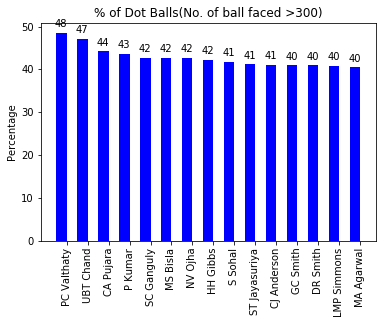

In [84]:
labels = np.array(Percentage_of_dot_balls_top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Percentage_of_dot_balls_top['% of dot balls']), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Percentage")
ax.set_title("% of Dot Balls(No. of ball faced >300)")
autolabel(rects)

In [85]:
Batsman_fours=deliveries.groupby(['inning'])["batsman_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
# taking only batsman runs where runs = 4 
Batsman_fours.columns = ["batsman", "No. of 4s"]
Batsman_fours.iloc[:20,:]

,batsman,No. of 4s
0,1,31365
1,2,29759
2,4,13
3,3,11


In [86]:
Batsman_duckouts=deliveries.groupby(['batsman'])["batsman_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
# taking only batsman runs where runs = 4 
Batsman_duckouts.columns = ["batsman", "DUCKS"]
Batsman_duckouts.iloc[:20,:]

,batsman,DUCKS
0,G Gambhir,1318
1,V Kohli,1287
2,S Dhawan,1210
3,RG Sharma,1185
4,CH Gayle,1178
5,RV Uthappa,1165
6,SK Raina,1163
7,DA Warner,1124
8,AM Rahane,1001
9,BB McCullum,985


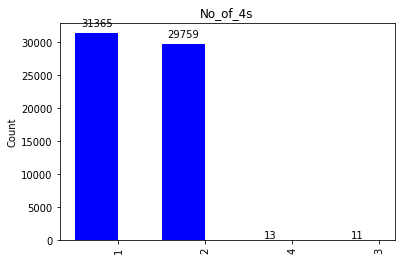

In [87]:
Batsman_fours_Top=Batsman_fours.iloc[:15,:]# top 10 player with most number of 4s
labels = np.array(Batsman_fours_Top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Batsman_fours_Top['No. of 4s']), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No_of_4s")
autolabel(rects)

In [88]:
Batsman_sixes=deliveries.groupby("batsman")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Batsman_sixes.columns= ["batsman","No_of_6s"]
Batsman_sixes.iloc[:20,:]

,batsman,No_of_6s
0,CH Gayle,266
1,SK Raina,174
2,RG Sharma,173
3,DA Warner,160
4,V Kohli,160
5,AB de Villiers,158
6,MS Dhoni,156
7,YK Pathan,149
8,KA Pollard,148
9,Yuvraj Singh,141


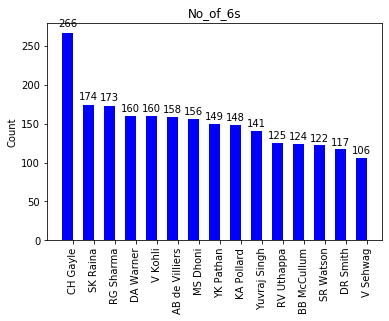

In [89]:
Batsman_sixes_Top=Batsman_sixes.iloc[:15,:]
labels = np.array(Batsman_sixes_Top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Batsman_sixes_Top['No_of_6s']), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No_of_6s")
autolabel(rects)

In [90]:
Batsman_dotballs=deliveries[deliveries["extra_runs"]==0].groupby(['batsman'])["batsman_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
# here the dot ball for a batsman will be if it is a legal delivery and batsman didn't score a run on it
Batsman_dotballs

,batsman,batsman_runs
0,V Kohli,1163
1,G Gambhir,1137
2,RG Sharma,1086
3,S Dhawan,1074
4,RV Uthappa,1006
...,...,...
455,I Malhotra,0
456,RD Chahar,0
457,RG More,0
458,KMDN Kulasekara,0


In [91]:
Batsman_Score_by_Match= deliveries[["match_id","batsman","batsman_runs"]]
Batsman_Score_by_Match=Batsman_Score_by_Match.groupby(["match_id","batsman"]).sum()
Batsman_with_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=100].reset_index()
Batsman_with_centuries=Batsman_with_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_centuries.columns=["batsman","No_of_centuries"]
Batsman_with_centuries

,batsman,No_of_centuries
0,CH Gayle,5
1,V Kohli,4
2,DA Warner,3
3,AB de Villiers,3
4,M Vijay,2
5,AC Gilchrist,2
6,V Sehwag,2
7,BB McCullum,2
8,HM Amla,2
9,SR Watson,2


In [92]:
Batsman_with_Half_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=50].reset_index()
Batsman_with_Half_centuries=Batsman_with_Half_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_Half_centuries_top=Batsman_with_Half_centuries[Batsman_with_Half_centuries["match_id"]>=10]
Batsman_with_Half_centuries_top.columns = ["batsman","No_of_half_centuries"]
Batsman_with_Half_centuries_top


,batsman,No_of_half_centuries
0,DA Warner,39
1,V Kohli,35
2,G Gambhir,35
3,RG Sharma,33
4,SK Raina,32
5,S Dhawan,28
6,CH Gayle,27
7,AM Rahane,26
8,AB de Villiers,26
9,RV Uthappa,22


Batsman NOT OUT analysis

This is a little complex analysis from my side *
If anyone can help me in this please give a cooment
Process
First I take the striker on the last ball of Inning means player will be not out, if he didn't out at last ball these instances will give the no of times player was on strike at last ball of inning
Then Non striker on the last ball, this will give me instance of non striker
Now take the player dismissed on last ball, this will give me the instances of out on the last balls
Now by subtracting from total no of above instances we can get data for batsman NOT OUT
Have a look at code, you will understand more

In [93]:
Striker_on_last_ball=deliveries[["match_id","batsman"]][(deliveries["over"]==20) & (deliveries["ball"]==6)]
# this will be last ball of a match
Striker_on_last_ball=Striker_on_last_ball.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
# this will count the number of instances for the batsman when he was on strike for last ball
Striker_on_last_ball.columns=["batsman","No_of_Matches"]

Non_Striker_on_last_ball=deliveries[["match_id","non_striker"]][(deliveries["over"]==20) & (deliveries["ball"]==6)]
Non_Striker_on_last_ball=Non_Striker_on_last_ball.groupby("non_striker")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
# same for Non_striker
Non_Striker_on_last_ball.columns=["batsman","No_of_Matches"]
Players_on_last_ball= pd.concat([Striker_on_last_ball,Non_Striker_on_last_ball],ignore_index=True)
# these are the total players concated
Players_on_last_ball=Players_on_last_ball.groupby("batsman")["No_of_Matches"].sum().reset_index().sort_values("No_of_Matches",ascending=False).reset_index(drop=True)
Players_on_last_ball.head(2)
# this give the number of instances when a player was at either striker or non striker end on last ball

,batsman,No_of_Matches
0,MS Dhoni,35
1,Harbhajan Singh,27


In [94]:
player_dismissed_on_last_ball=deliveries[["match_id","player_dismissed"]][(deliveries["over"]==20) & (deliveries["ball"]==6)]
player_dismissed_on_last_ball=player_dismissed_on_last_ball.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
player_dismissed_on_last_ball.columns=["batsman","No_of_Matches"]
player_dismissed_on_last_ball.head(2)
# this gives the no of instances when a player was dismissed on last ball

,batsman,No_of_Matches
0,RP Singh,4
1,S Badrinath,4


In [95]:
Batsman_Not_out=pd.merge(Players_on_last_ball,player_dismissed_on_last_ball,on ="batsman",how="outer")
Batsman_Not_out=Batsman_Not_out.fillna(0)
Batsman_Not_out["Not_out"]=Batsman_Not_out["No_of_Matches_x"]-Batsman_Not_out["No_of_Matches_y"]
Batsman_Not_out.drop("No_of_Matches_x",axis=1,inplace=True)

Batsman_Not_out.drop("No_of_Matches_y",axis=1,inplace=True)
Batsman_Not_out=Batsman_Not_out.sort_values(by="Not_out",ascending=False)
Batsman_Not_out

,batsman,Not_out
0,MS Dhoni,33.0
1,Harbhajan Singh,26.0
2,IK Pathan,24.0
4,JA Morkel,23.0
3,KA Pollard,22.0
...,...,...
318,M Vijay,0.0
286,Ishan Kishan,0.0
287,CK Langeveldt,0.0
247,SM Pollock,0.0


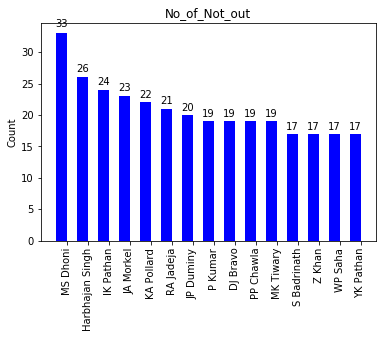

In [96]:
Batsman_Not_out_Top =Batsman_Not_out.iloc[:15,:]
labels = np.array(Batsman_Not_out_Top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Batsman_Not_out_Top['Not_out']), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No_of_Not_out")
autolabel(rects)

Average of Batsman- Definition of Consistency

Average of Batsman = Total Runs/ No of Matches in which he dismmised

In [97]:
No_Matches_player_dismissed = deliveries[["match_id","player_dismissed"]]
No_Matches_player_dismissed =No_Matches_player_dismissed .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player_dismissed.columns=["batsman","No_of Matches"]
No_Matches_player_dismissed .head(2)

,batsman,No_of Matches
0,SK Raina,134
1,G Gambhir,131


In [98]:
Batsman_Average=pd.merge(Batsman_score,No_Matches_player_dismissed ,on="batsman")
#merging the score and match played by batsman
Batsman_Average=Batsman_Average[Batsman_Average["batsman_runs"]>=500]
# taking Average for those player for having more than 500 runs under thier belt
Batsman_Average["Average"]=(Batsman_Average["batsman_runs"]/Batsman_Average["No_of Matches"])
Batsman_Average=Batsman_Average.sort_values(by="Average",ascending=False).reset_index(drop=True)

Batsman_Average.iloc[:20,:]

,batsman,batsman_runs,No_of Matches,Average
0,HM Amla,577,13,44.384615
1,CH Gayle,3651,89,41.022472
2,DA Warner,4014,100,40.140000
3,LMP Simmons,1079,27,39.962963
4,JP Duminy,1993,50,39.860000
5,SE Marsh,2489,63,39.507937
6,MEK Hussey,1977,51,38.764706
7,AB de Villiers,3486,91,38.307692
8,MS Dhoni,3560,94,37.872340
9,V Kohli,4423,118,37.483051


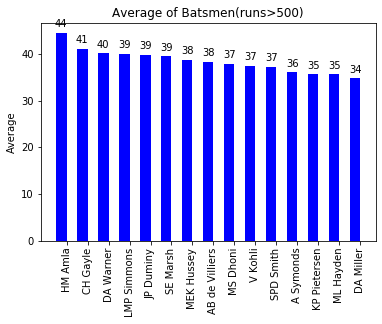

In [99]:
Batsman_Average_Top=Batsman_Average.iloc[:15,:]
labels = np.array(Batsman_Average_Top['batsman'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Batsman_Average_Top["Average"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Average")
ax.set_title("Average of Batsmen(runs>500)")
autolabel(rects)

Bowler Analysis
Lets Start with No of wickets taken by bowler*

In [100]:
Bowler_wicket = deliveries[deliveries["dismissal_kind"] != "run out"]
Bowler_wicket= Bowler_wicket[["bowler","player_dismissed"]]
Bowler_wicket = Bowler_wicket.dropna()
Bowler_wicket= Bowler_wicket.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_wicket.columns=["bowler","Wickets"]
Bowler_wicket.iloc[:20,:]

,bowler,Wickets
0,SL Malinga,154
1,A Mishra,134
2,Harbhajan Singh,127
3,PP Chawla,126
4,DJ Bravo,122
5,B Kumar,111
6,A Nehra,106
7,Z Khan,103
8,R Vinay Kumar,103
9,R Ashwin,100


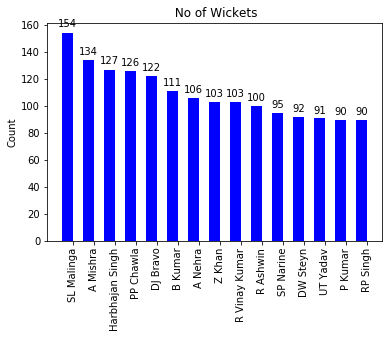

In [101]:
Bowler_wicket_Top =Bowler_wicket.iloc[:15,:]
labels = np.array(Bowler_wicket_Top['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_wicket_Top["Wickets"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title(" No of Wickets")
autolabel(rects)

In [367]:
Bowler_over= deliveries[deliveries["extra_runs"]==0][["ball","bowler"]] # here extra balls I am not considering include in over
Bowler_over= Bowler_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_over["No_of_Overs"]=(Bowler_over["ball"]/6)
Bowler_over.iloc[:20,:]

,bowler,ball,No_of_Overs
0,Harbhajan Singh,2873,478.833333
1,A Mishra,2608,434.666667
2,PP Chawla,2538,423.000000
3,SL Malinga,2491,415.166667
4,P Kumar,2452,408.666667
5,R Ashwin,2249,374.833333
6,Z Khan,2144,357.333333
7,R Vinay Kumar,2066,344.333333
8,DW Steyn,2022,337.000000
9,IK Pathan,1993,332.166667


TypeError: 'float' object is not callable

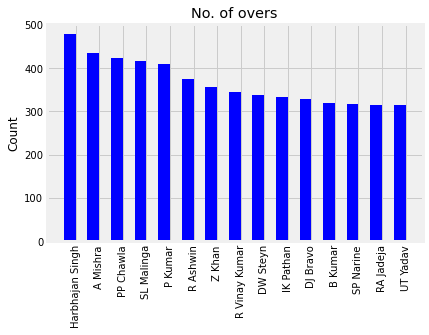

In [368]:
Bowler_over_Top =Bowler_over.iloc[:15,:]
labels = np.array(Bowler_over_Top['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_over_Top["No_of_Overs"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No. of overs")
autolabel(rects)

TypeError: 'float' object is not callable

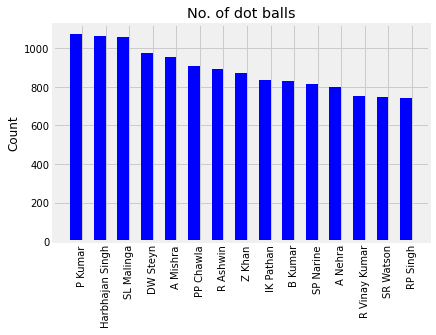

In [369]:
Bowler_dotball= deliveries.groupby("bowler")["total_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_dotball.columns=["bowler","No_of_balls"]
Bowler_dotball_Top = Bowler_dotball.iloc[:15,:]
labels = np.array(Bowler_dotball_Top['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_dotball_Top["No_of_balls"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No. of dot balls")
autolabel(rects)

TypeError: 'float' object is not callable

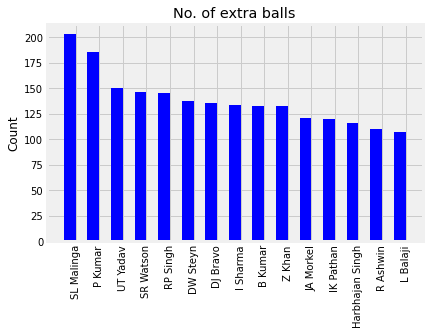

In [370]:
Bowler_extraball= deliveries.groupby("bowler")["extra_runs"].agg(lambda x: (x>0).sum()).reset_index().sort_values(by="extra_runs",ascending=False).reset_index(drop=True)
Bowler_extraball.columns=["bowler","No_of_balls"]
Bowler_extraball_Top = Bowler_extraball.iloc[:15,:]
labels = np.array(Bowler_extraball_Top ['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_extraball_Top ["No_of_balls"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No. of extra balls")
autolabel(rects)

TypeError: 'float' object is not callable

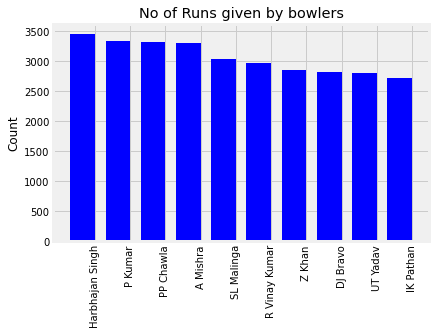

In [371]:
Bowler_Runs= deliveries.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_Runs.columns=["bowler","Total_runs_given"]

Bowler_Runs_Top = Bowler_Runs.iloc[:10,:]
labels = np.array(Bowler_Runs_Top['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.7 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_Runs_Top["Total_runs_given"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No of Runs given by bowlers")
autolabel(rects)

In [372]:
Bowler_economy= pd.merge(Bowler_Runs,Bowler_over,on="bowler")

In [373]:
Bowler_economy=Bowler_economy[Bowler_economy["No_of_Overs"]>50] # taking only bowler with minimum 50 ov
Bowler_economy["Economy_rate"]=Bowler_economy["Total_runs_given"]/Bowler_economy["No_of_Overs"]
Bowler_economy=Bowler_economy.sort_values(by="Economy_rate").reset_index(drop=True)
Bowler_economy.iloc[:20,:]

,bowler,Total_runs_given,ball,No_of_Overs,Economy_rate
0,SP Narine,2085,1904,317.333333,6.570378
1,R Ashwin,2552,2249,374.833333,6.808359
2,A Kumble,1089,942,157.000000,6.936306
3,GD McGrath,366,315,52.500000,6.971429
4,Rashid Khan,368,316,52.666667,6.987342
5,DL Vettori,894,763,127.166667,7.030144
6,DW Steyn,2375,2022,337.000000,7.047478
7,M Muralitharan,1765,1485,247.500000,7.131313
8,RE van der Merwe,515,432,72.000000,7.152778
9,R Sharma,1100,918,153.000000,7.189542


TypeError: 'float' object is not callable

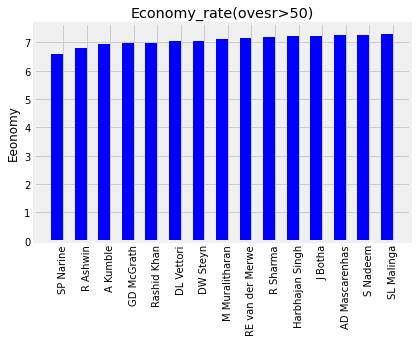

In [374]:
Bowler_economy_Top = Bowler_economy.iloc[:15,:]
labels = np.array(Bowler_economy_Top['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_economy_Top["Economy_rate"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Eeonomy")
ax.set_title("Economy_rate(ovesr>50)")
autolabel(rects)

In [375]:
Bowler_Strike_rate = pd.merge(Bowler_over,Bowler_wicket,on="bowler")
Bowler_Strike_rate= Bowler_Strike_rate[Bowler_Strike_rate["No_of_Overs"]>50] # taking only bowler with minimum 50 overs
Bowler_Strike_rate["Strike_rate"]=Bowler_Strike_rate["ball"]/Bowler_Strike_rate["Wickets"]
Bowler_Strike_rate=Bowler_Strike_rate.sort_values(by="Strike_rate").reset_index(drop=True)
Bowler_Strike_rate.iloc[:20,:]

,bowler,ball,No_of_Overs,Wickets,Strike_rate
0,DE Bollinger,560,93.333333,38,14.736842
1,Imran Tahir,708,118.000000,47,15.063830
2,MF Maharoof,408,68.000000,27,15.111111
3,NM Coulter-Nile,549,91.500000,36,15.250000
4,MR Marsh,309,51.500000,20,15.450000
5,VY Mahesh,332,55.333333,21,15.809524
6,AD Mascarenhas,302,50.333333,19,15.894737
7,SL Malinga,2491,415.166667,154,16.175325
8,DJ Bravo,1975,329.166667,122,16.188525
9,MA Starc,556,92.666667,34,16.352941


TypeError: 'float' object is not callable

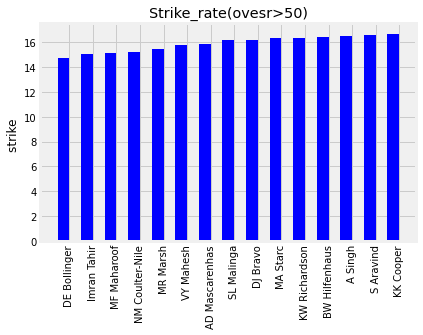

In [376]:
Bowler_Strike_rate_Top = Bowler_Strike_rate.iloc[:15,:]
labels = np.array(Bowler_Strike_rate_Top['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_Strike_rate_Top ["Strike_rate"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("strike ")
ax.set_title("Strike_rate(ovesr>50)")
autolabel(rects)

In [377]:
Bowler_Average = pd.merge(Bowler_Runs,Bowler_wicket,on="bowler")
Bowler_Average= Bowler_Average[Bowler_Average["Wickets"]>20] # taking only bowler with minimum 20 wickets
Bowler_Average["Average"]=Bowler_Average["Total_runs_given"]/Bowler_Average["Wickets"]
Bowler_Average=Bowler_Average.sort_values(by="Average").reset_index(drop=True)
Bowler_Average.iloc[:20,:]

,bowler,Total_runs_given,Wickets,Average
0,Sohail Tanvir,275,22,12.500000
1,DE Bollinger,716,38,18.842105
2,SL Malinga,3034,154,19.701299
3,MF Maharoof,532,27,19.703704
4,NM Coulter-Nile,739,36,20.527778
5,Imran Tahir,1002,47,21.319149
6,MA Starc,725,34,21.323529
7,B Kumar,2410,111,21.711712
8,SP Narine,2085,95,21.947368
9,BW Hilfenhaus,497,22,22.590909


TypeError: 'float' object is not callable

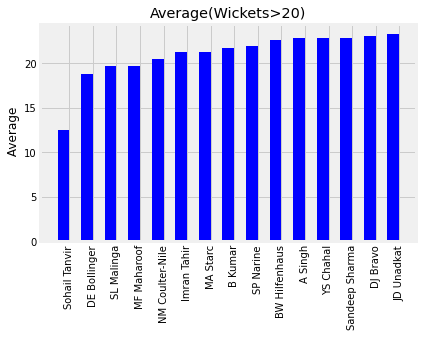

In [378]:
Bowler_Average_Top = Bowler_Average.iloc[:15,:]
labels = np.array(Bowler_Average_Top['bowler'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Bowler_Average_Top["Average"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel(" Average")
ax.set_title("Average(Wickets>20)")
autolabel(rects)

In [379]:
Bowler_Strike_rate.drop("ball",axis=1,inplace=True)
Bowler_Average.drop("Wickets",axis=1,inplace=True) # removing Unnesecary data
Bowler_economy1=Bowler_economy[["bowler","Economy_rate"]]
Bowler_Report = pd.merge(Bowler_Strike_rate,Bowler_Average,on="bowler")
Bowler_Report1=pd.merge(Bowler_Report,Bowler_economy1,on="bowler")
Bowler_Report= Bowler_Report1[["bowler","No_of_Overs","Wickets","Total_runs_given","Economy_rate","Strike_rate","Average"]]
Bowler_Report = Bowler_Report.sort_values(by="Wickets",ascending=False).reset_index(drop=True)
Bowler_Report

,bowler,No_of_Overs,Wickets,Total_runs_given,Economy_rate,Strike_rate,Average
0,SL Malinga,415.166667,154,3034,7.307908,16.175325,19.701299
1,A Mishra,434.666667,134,3305,7.603528,19.462687,24.664179
2,Harbhajan Singh,478.833333,127,3453,7.211277,22.622047,27.188976
3,PP Chawla,423.000000,126,3315,7.836879,20.142857,26.309524
4,DJ Bravo,329.166667,122,2815,8.551899,16.188525,23.073770
...,...,...,...,...,...,...,...
88,STR Binny,89.166667,22,686,7.693458,24.318182,31.181818
89,TG Southee,107.500000,22,930,8.651163,29.318182,42.272727
90,S Kaul,69.166667,22,611,8.833735,18.863636,27.772727
91,VY Mahesh,55.333333,21,511,9.234940,15.809524,24.333333


In [380]:
Wicket_Keepers = deliveries[deliveries["dismissal_kind"]=="stumped"][["fielder"]]
Wicket_Keepers= Wicket_Keepers.drop_duplicates().reset_index(drop=True)
Wicket_Keepers # in this list some part time wicket keeper also there


,fielder
0,RR Pant
1,MS Dhoni
2,RV Uthappa
3,WP Saha
4,KM Jadhav
5,PA Patel
6,Vishnu Vinod
7,MV Boucher
8,Kamran Akmal
9,SP Goswami


In [381]:
# lets First calculate the no of stumps by a wicket keeper
Wicket_keeper_data = pd.merge(deliveries,Wicket_Keepers,on="fielder") 
Wicket_keeper_Stumps =Wicket_keeper_data.groupby("fielder")["dismissal_kind"].agg(lambda x : (x=="stumped").sum()).reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Wicket_keeper_Stumps.columns= ["Wicket_keeper", "Stumps"]
Wicket_keeper_Stumps

,Wicket_keeper,Stumps
0,RV Uthappa,32
1,MS Dhoni,30
2,KD Karthik,26
3,WP Saha,17
4,AC Gilchrist,16
5,PA Patel,14
6,NV Ojha,10
7,KC Sangakkara,9
8,AB de Villiers,7
9,SP Goswami,7


In [382]:
# I have Checked the stumps data with records they are matching
Wicket_keeper_Catches =Wicket_keeper_data.groupby("fielder")["dismissal_kind"].agg(lambda x : (x=="caught").sum()).reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Wicket_keeper_Catches.columns =["Wicket_Keeper","No_of_cathes"]
Wicket_keeper_Catches

,Wicket_Keeper,No_of_cathes
0,KD Karthik,88
1,AB de Villiers,81
2,MS Dhoni,76
3,RV Uthappa,75
4,NV Ojha,65
5,PA Patel,60
6,WP Saha,51
7,AC Gilchrist,51
8,AT Rayudu,45
9,KC Sangakkara,45


TypeError: 'float' object is not callable

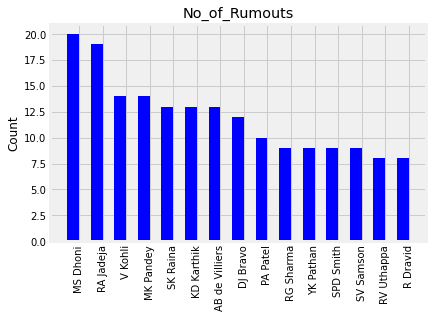

In [383]:
Fielder_data = deliveries[["dismissal_kind","fielder"]].dropna() # bowled data will also be droped because  no fielder involve
Fielder_Runout=Fielder_data.groupby("fielder")["dismissal_kind"].agg(lambda x: (x=="run out").sum()).reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Fielder_Runout_Top = Fielder_Runout.iloc[:15,:]
Fielder_Runout_Top.columns=["fielder","No_of_Rumouts"]
labels = np.array(Fielder_Runout_Top['fielder'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(Fielder_Runout_Top["No_of_Rumouts"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No_of_Rumouts")
autolabel(rects)

In [384]:
fielder_catch=deliveries[["bowler","dismissal_kind","fielder"]]
fielder_catch.fielder.fillna(fielder_catch.bowler,inplace=True) # this might be silly
# but the catches taken by biowler when he was bowling i.e. dismissal kind is Caught and bowled
#that also will counted as no of catches by that bowler
# but now fielder is not avaliable for this
#so i replace all by bowler

C:\Users\nithin\.conda\envs\tf\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: 'float' object is not callable

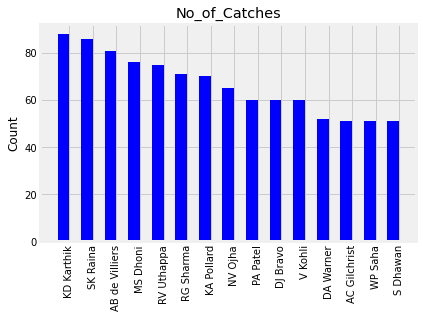

In [385]:
fielder_catch= fielder_catch.groupby("fielder")["dismissal_kind"].agg(lambda x : ((x=="caught") | (x=="caught and bowled")).sum()).reset_index()
fielder_catch= fielder_catch.sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
fielder_catch.columns=["fielder","No.of Catches"]
fielder_catch_top=fielder_catch.iloc[:15,:]
labels = np.array(fielder_catch_top['fielder'])# x axis label of graph
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
rects = ax.bar(ind, np.array(fielder_catch_top["No.of Catches"]), width=width, color='blue')# here ind is X
#and np.array(Batsman_Ball_faced_Top['ball']) value is height
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical') # this is for label x axis
ax.set_ylabel("Count")
ax.set_title("No_of_Catches")
autolabel(rects)

In [386]:
Season_data = match_df[["id","season"]]
Season_data.columns = ["match_id","season"]
Season_data=pd.merge(deliveries,Season_data,on="match_id")
Season_orange_cap = Season_data.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Season_orange_cap= Season_orange_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_orange_cap

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


In [387]:
Season_purple_cap=Season_data[Season_data["dismissal_kind"]!="run out"]
Season_purple_cap=Season_data.groupby(["season","bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Season_purple_cap= Season_purple_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_purple_cap.columns= ["Season","Bowler","Wicket_taken"]
Season_purple_cap

,Season,Bowler,Wicket_taken
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


In [389]:
Season_Highest=Season_data.groupby(["match_id","season","inning","batting_team","bowling_team"])["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False)
Season_Highest=Season_Highest.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
#Season_Highest.drop(["match_id","inning"],axis=1,inplace=True)
Season_Highest

,match_id,season,inning,batting_team,bowling_team,total_runs
0,61,2008,1,Chennai Super Kings,Kings XI Punjab,240
1,145,2009,1,Rajasthan Royals,Kings XI Punjab,211
2,206,2010,1,Chennai Super Kings,Rajasthan Royals,246
3,296,2011,1,Kings XI Punjab,Royal Challengers Bangalore,232
4,380,2012,1,Chennai Super Kings,Delhi Daredevils,222
5,411,2013,1,Royal Challengers Bangalore,Pune Warriors,263
6,486,2014,1,Kings XI Punjab,Chennai Super Kings,231
7,562,2015,1,Royal Challengers Bangalore,Mumbai Indians,235
8,620,2016,1,Royal Challengers Bangalore,Gujarat Lions,248
9,50,2017,1,Kings XI Punjab,Mumbai Indians,230


In [390]:
Season_sixes =Season_data.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
Season_sixes

,season,batsman_runs
0,2008,623
1,2009,508
2,2010,587
3,2011,639
4,2012,733
5,2013,681
6,2014,715
7,2015,692
8,2016,639
9,2017,706


In [391]:
Season_fours =Season_data.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_fours


,season,batsman_runs
0,2008,1703
1,2009,1321
2,2010,1709
3,2011,1916
4,2012,1911
5,2013,2054
6,2014,1563
7,2015,1611
8,2016,1633
9,2017,1612


In [392]:
Season_total_runs =Season_data.groupby("season")["total_runs"].sum().reset_index()
Season_total_runs

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


In [393]:
Season_Wickets =Season_data.groupby(["season","dismissal_kind"])["player_dismissed"].count()
Season_Wickets

season  dismissal_kind   
2008    bowled               131
        caught               400
        caught and bowled     21
        hit wicket             2
        lbw                   37
                            ... 
2017    hit wicket             1
        lbw                   56
        retired hurt           1
        run out               58
        stumped               21
Name: player_dismissed, Length: 74, dtype: int64

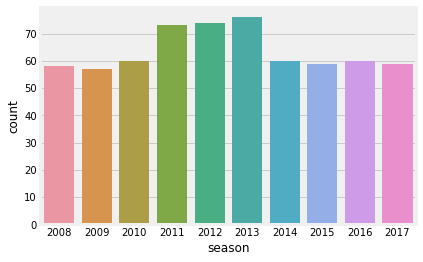

In [394]:
sns.countplot(x="season",data=match_df)

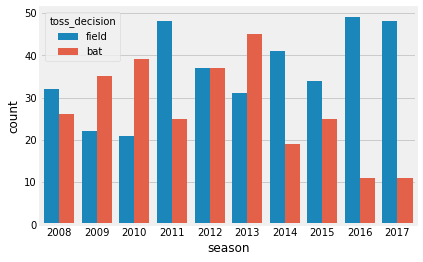

In [395]:
sns.countplot(x="season",hue="toss_decision",data=match_df)

## CONSISTENCY BATTING=.4262*AVG+.2566*NO_OF_INN
## +.1510*SRTIKE_RATE+
## .0787*CENTURIES+.0556*FIFTIES-.0128*ZEROS
## -.01*BATTINGSMAN_DOT_BALL-.01*PEC_OF DOT_BALL

In [220]:
Batsman_Average=Batsman_Average.drop(['batsman','batsman_runs','No_of Matches'],axis=1)

In [219]:
Batsman_Average.drop(['batsman','batsman_runs','No_of Matches'],axis=1)

,Average
0,44.384615
1,41.022472
2,40.140000
3,39.962963
4,39.860000
...,...
88,20.157895
89,17.695652
90,17.684211
91,15.666667


In [222]:
#Batsman_Average=.4262*Batsman_Average

In [223]:
Batsman_Average

,Average
0,18.916723
1,17.483778
2,17.107668
3,17.032215
4,16.988332
...,...
88,8.591295
89,7.541887
90,7.537011
91,6.677133


In [461]:
Batsman_with_centuries.isnull().values.any()


False

In [228]:
Batsman_with_centuries=pd.to_numeric(Batsman_with_centuries['No_of_centuries'], downcast='float')

In [229]:
#Batsman_with_centuries=.0787*Batsman_with_centuries

In [473]:
Batsman_Score_by_Match.isnull().values.any()

False

In [248]:
Batsman_with_Half_centuries=Batsman_with_Half_centuries.drop(['batsman'],axis=1)

In [249]:
#Batsman_with_Half_centuries=Batsman_with_Half_centuries*.0556

In [420]:
Batsman_with_Half_centuries=Batsman_with_Half_centuries.drop(['match_id'],axis=1)


In [470]:
Percentage_of_dot_balls.head()






,batsman,ball,batsman_runs
0,V Kohli,3494,1163.0
1,G Gambhir,3433,1137.0
2,SK Raina,3369,1003.0
3,RG Sharma,3274,1086.0
4,S Dhawan,3005,1074.0


In [254]:
#Percentage_of_dot_balls=Percentage_of_dot_balls*.02

In [421]:
Batsman_with_Half_centuries.head()

,batsman
0,DA Warner
1,V Kohli
2,G Gambhir
3,RG Sharma
4,SK Raina


In [404]:
Batsman_strike_rate1=Batsman_strike_rate1.drop(['batsman'],axis=1)

In [297]:
#Batsman_strike_rate=Batsman_strike_rate1*.2495

In [415]:
Batsman_Score_by_Match=Batsman_Score_by_Match*.22

Batsman_Average,Batsman_with_centuries,Batsman_with_Half_centuries,Percentage_of_dot_balls,Batsman_strike_rate,Batsman_Score_by_Match

In [416]:
Batsman_Score_by_Match

batsman_runs
match_id batsman                   
1        A Choudhary           1.32
         BCJ Cutting           3.52
         CH Gayle              7.04
         DA Warner             3.08
         DJ Hooda              3.52
...                             ...
636      SR Watson             2.42
         STR Binny             1.98
         Sachin Baby           3.96
         V Kohli              11.88
         Yuvraj Singh          8.36

[9515 rows x 1 columns]

In [406]:
from sklearn import preprocessing
# Get column names first
names = Batsman_strike_rate1.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(Batsman_strike_rate1)
Batsman_strike_rate1 = pd.DataFrame(scaled_df, columns=names)

In [424]:
Batsman_with_Half_centuries_a.head(5)

,match_id
0,3.910541
1,3.422718
2,3.422718
3,3.178806
4,3.056850


In [ ]:
Batsman_strike_rate1       Batsman_Score_by_Match   Percentage_of_dot_balls_a   Batsman_with_Half_centuries   Batsman_Average

In [442]:
Batsman_Score_by_Match.tail()


batsman_runs
match_id batsman                   
636      SR Watson             2.42
         STR Binny             1.98
         Sachin Baby           3.96
         V Kohli              11.88
         Yuvraj Singh          8.36

In [484]:
consistency={}
consistency['total']=Batsman_strike_rate1['strike_rate']+Batsman_Average['Average']
consistency


{'total': 0     22.455999
 1     20.442700
 2     19.278734
 3     19.131541
 4     18.825933
         ...    
 88     6.985804
 89     5.845304
 90     5.833031
 91     4.964774
 92     3.150552
 Length: 93, dtype: float64}

In [432]:
c=Percentage_of_dot_balls_a['% of dot balls']+Batsman_with_Half_centuries_a['match_id']+Batsman_with_centuries['No_of_centuries']

In [485]:
consistency['total']=consistency['total']+c


In [486]:
consistency['total'].replace(np.nan,0)

0      30.956252
1      27.417708
2      24.498529
3      24.874076
4      24.026182
         ...    
133     0.000000
134     0.000000
135     0.000000
136     0.000000
137     0.000000
Length: 138, dtype: float64

In [488]:
consistency

{'total': 0      30.956252
 1      27.417708
 2      24.498529
 3      24.874076
 4      24.026182
          ...    
 133          NaN
 134          NaN
 135          NaN
 136          NaN
 137          NaN
 Length: 138, dtype: float64}

In [490]:


consistency=pd.Series(consistency,index=consistency.keys())